In [25]:
import sys 
sys.path.append('../fsp')
import stochCalc
import numpy as np
import matplotlib.pyplot as plt

1A. See \fsp\stochCalc.py for details, but it exists and should work properly (though inefficiently, for some RAM savings). <br>
1B. Using the market price at risk, $\Theta = \frac{\alpha(t) - R(t)}{\sigma(t)}$, and the Girsanov Theorem. 

$d(D(t)S(t)) = \sigma(t) D(t) S(t) d\tilde W(t)$

So the new formula under the risk neutral measure is $\alpha(t) S_t = (\alpha(t) - R(t)) D(t) S(t)$, <br> and <br> $\sigma(t) S(t) = \sigma(t) S(t) D(t)$

Where $D(t) = \left[e^{\int_0^t R(s) ds} \right]^{-1}$


In our case $D(t) = e^{-rt}$, so: 

$\tilde \alpha = (0.1 -0.5) e^{-0.05t} $ <br>
$\tilde \sigma = \sigma e^{-0.05t}  $

In [26]:
sigma_g = 0.0
def Beta(x : float):
    return x * 0.1 

def Gamma_3(x: float ):
    return x * 0.3

def Gamma_2(x: float ):
    return x * 0.1

def Gamma_1(x: float ):
    return x * 0.05


Text(0, 0.5, '$x$')

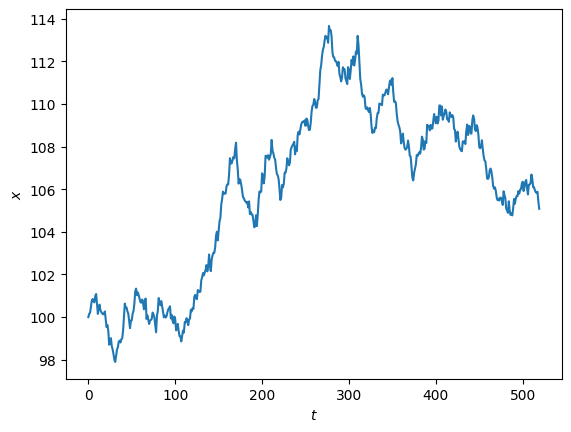

In [27]:
sde1 = stochCalc.SDE(X0=100, lambda_t=1/260, N = 520, Beta=Beta, Gamma=Gamma_1)
x = sde1.getValidPath()
plt.plot(x)
plt.xlabel("$t$")
plt.ylabel("$x$")

# This limits out becuase of how 

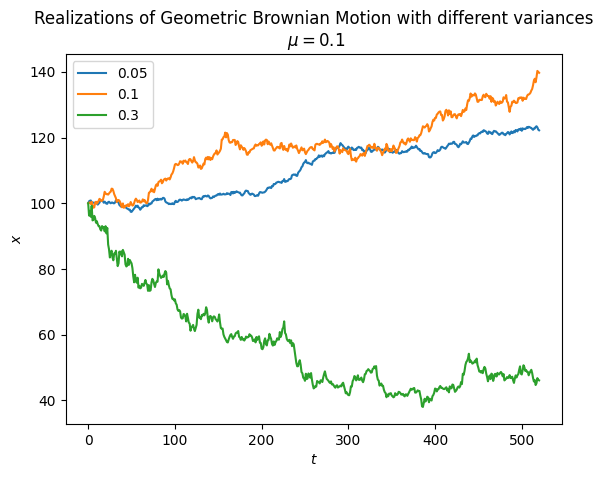

In [28]:
mu = 0.1
n = 520
dt = 1/260
x0 = 100
np.random.seed(3)

sigma = np.array([0.05, 0.1, 0.3])

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T

)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=0.1$"
)
plt.show()

In [29]:
import math 
val_N = 0
val_No2 = 0
i = 0
sde1 = stochCalc.SDE(X0=100, lambda_t=1/260, N = 520, Beta=Beta, Gamma=Gamma_1)
for path in sde1.getValidPaths(M=100):
    val_N += path[len(path)-1]
    val_No2 += path[math.floor(len(path)/2)]
    i += 1

print("GAMMA_1: SIGMA = 0.05")
print("E[S(N)] = ", val_N/i)
print("E[S(N/2)] = ", val_No2/i)


GAMMA_1: SIGMA = 0.05
E[S(N)] =  121.36012764326836
E[S(N/2)] =  110.79599319119487


In [30]:
import math 
val_N = 0
val_No2 = 0
i = 0
sde1 = stochCalc.SDE(X0=100, lambda_t=1/260, N = 520, Beta=Beta, Gamma=Gamma_2)
for path in sde1.getValidPaths(M=100):
    val_N += path[len(path)-1]
    val_No2 += path[math.floor(len(path)/2)]
    i += 1

print("GAMMA_2: SIGMA = 0.1")
print("E[S(N)] = ", val_N/i)
print("E[S(N/2)] = ", val_No2/i)


GAMMA_2: SIGMA = 0.1
E[S(N)] =  121.75798362559033
E[S(N/2)] =  111.69752339261323


In [34]:
import math 
val_N = 0
val_No2 = 0
i = 0
sde1 = stochCalc.SDE(X0=100, lambda_t=1/260, N = 520, Beta=Beta, Gamma=Gamma_3)
for path in sde1.getValidPaths(M=100):
    val_N += path[len(path)-1]
    val_No2 += path[math.floor(len(path)/2)]
    i += 1

print("GAMMA_3: SIGMA = 0.3")
print("E[S(N)] = ", val_N/i)
print("E[S(N/2)] = ", val_No2/i)


GAMMA_3: SIGMA = 0.3
E[S(N)] =  128.73953815370132
E[S(N/2)] =  116.32116126096042


To connect the geometric Brownian motion process to the Black-Scholes model, you can use the Black-Scholes formula to obtain a formula for the value of a European call option (V [N=2]) in terms of the price of the underlying asset at time t=2 (S [N=2]). In the Black-Scholes model, the value of a European call option with strike price K, time to expiration T, and underlying asset price S at time t is given by the following formula:

$$C(S, t) = S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$

where $N(x)$ is the cumulative distribution function of the standard normal distribution, and:

$$d_1 = \frac{\ln\left(\frac{S_t}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T-t)}{\sigma\sqrt{T-t}}$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

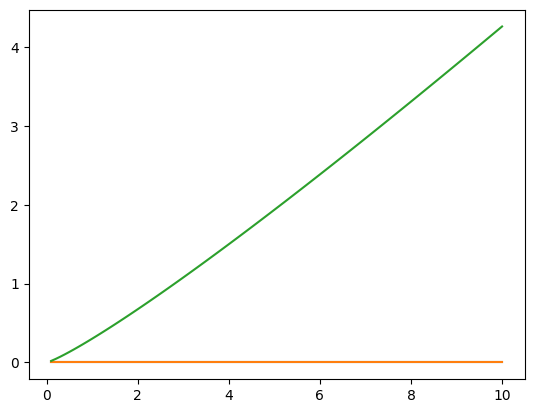

In [44]:
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))
from scipy.stats import norm


def black_scholes(S, sigma, K=np.exp(0.1 * 520), r=0.05, T=520):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


S_range = np.linspace(0.1, 10, 100)
plt.plot(S_range, black_scholes(S_range,0.05))
S_range = np.linspace(0.1, 10, 100)
plt.plot(S_range, black_scholes(S_range,0.1))
S_range = np.linspace(0.1, 10, 100)
plt.plot(S_range, black_scholes(S_range,0.3))
